In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, LabelEncoder
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("Final_Data_2.csv")
data.head()

,Unnamed: 0,id,Desingations_CEO,Desingations_Founder,Desingations_HR,Desingations_Head_engg,Desingations_Missing,Desingations_VP,Noida,Delhi,...,Company_Name,Company_Type,Contact Status,Tech_req_Data_Science,Tech_req_cloud_computing,Tech_req_data,Tech_req_frontend,Tech_req_fullstack,Tech_req_other_tech,Tech_req_tester
0,0,0,0,1,0,0,0,0,1.0,1.0,...,10Times,1,Not_Responded,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,1.0,1.0,...,1Mg.Com,1,Not_Responded,0,0,0,0,0,0,0
2,2,2,0,1,0,0,0,0,1.0,1.0,...,1Thing: Your Right Design Team,1,Not_Responded,0,0,0,0,0,0,0
3,3,3,0,1,0,0,0,0,1.0,1.0,...,23Bytes,1,Not_Responded,0,0,0,0,0,0,0
4,4,4,0,1,0,0,0,0,0.0,0.0,...,360Growe,1,Not_Responded,0,0,0,0,1,0,0


In [4]:
data.drop(columns=['Unnamed: 0', 'id','Company_Name'], inplace=True)

In [5]:
d = pd.DataFrame(data["Contact Status"])
le = LabelEncoder()
x = le.fit_transform(data["Contact Status"])

In [6]:
data.drop(columns="Contact Status", inplace=True)
data["Contact_Status"] = x

# Graphs

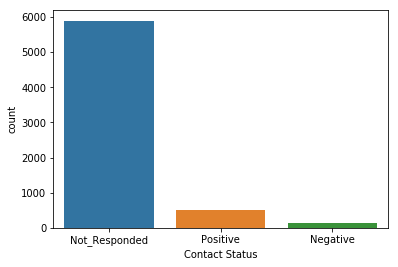

In [15]:
ax = sb.countplot(x="Contact Status", data=d)

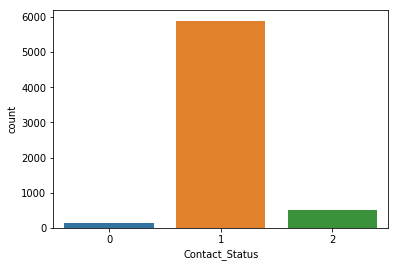

In [16]:
ax = sb.countplot(x="Contact_Status", data=data)

# Algo :

In [7]:
X = pd.DataFrame(data.drop(columns="Contact_Status"))
y = pd.DataFrame(data["Contact_Status"])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Random Forest

In [10]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='micro')
score = classifier.score(X_test,y_test)
accuracy, f1, score

(0.8966992665036675, 0.8966992665036675, 0.8966992665036675)

In [11]:
cm

array([[   0,   35,    0],
       [   3, 1467,    6],
       [   0,  125,    0]])

## GridSearchCV on Random Forest

In [21]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)

rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

rfc1.fit(X_train, y_train)

y_pred = rfc1.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='micro')
score = classifier.score(X_test,y_test)
accuracy, f1, score

(0.902200488997555, 0.902200488997555, 0.8966992665036675)

In [22]:
cm

array([[   0,   35,    0],
       [   0, 1476,    0],
       [   0,  125,    0]])

# imblearn

In [44]:
from imblearn.over_sampling import SMOTE
smote =SMOTE('minority')
X_train, y_train = smote.fit_sample(X_train, y_train)

In [48]:
X_train.shape
y_train = y_train.reshape(len(y_train),1)

* __Random Forest__

In [56]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

y_pred = y_pred.reshape(len(y_pred),1)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='micro')
score = classifier.score(X_test,y_test)
accuracy, f1, score

(0.78239608801956, 0.78239608801956, 0.78239608801956)

In [58]:
cm

array([[   7,   27,    1],
       [ 195, 1273,    8],
       [  17,  108,    0]])

* __GridSearchCV on random forest__

In [54]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)

rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

rfc1.fit(X_train, y_train)

y_pred = rfc1.predict(X_test)

y_pred = y_pred.reshape(len(y_pred),1)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='micro')
score = classifier.score(X_test,y_test)
accuracy, f1, score

(0.8245721271393643, 0.8245721271393643, 0.8966992665036675)

In [55]:
cm

array([[   6,   29,    0],
       [ 133, 1343,    0],
       [  17,  108,    0]])